1. Average Eye Size: 15.05 mm
2. Shapiro-Wilk Test for Normal Distribution (p-value): 0.3045
   Total body length has a normal distribution.
3. Pearson Correlation Coefficient: 0.2683
   There is a significant relationship between total body length and possum age.
4. Independent t-test p-value: 0.1820
   There is no significant difference in total body length between Victoria and other provinces.


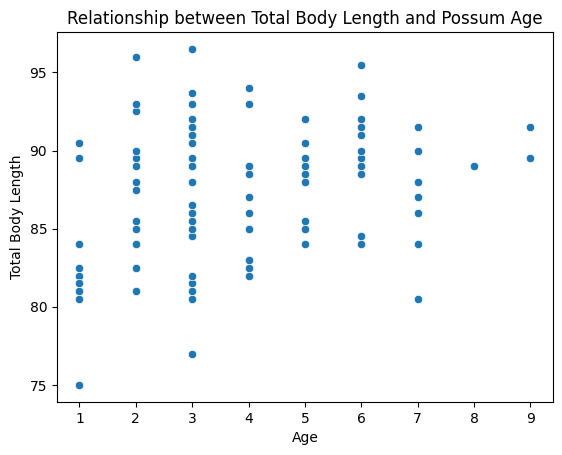

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, pearsonr, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'possum.csv'
possum_data = pd.read_csv(file_path)

# 1. Find average eye size
average_eye_size = possum_data['eye'].mean()
print(f"1. Average Eye Size: {average_eye_size:.2f} mm")

# 2. Check if total body length has a normal distribution using Shapiro-Wilk test
stat, p_value = shapiro(possum_data['totlngth'])
print(f"2. Shapiro-Wilk Test for Normal Distribution (p-value): {p_value:.4f}")
if p_value > 0.05:
    print("   Total body length has a normal distribution.")
else:
    print("   Total body length does not have a normal distribution.")

# 3. Check the relationship between total body length and possum age using Pearson correlation
correlation, p_corr = pearsonr(possum_data['totlngth'], possum_data['age'])
print(f"3. Pearson Correlation Coefficient: {correlation:.4f}")
if p_corr < 0.05:
    print("   There is a significant relationship between total body length and possum age.")
else:
    print("   There is no significant relationship between total body length and possum age.")

# 4. Test hypothesis that total body length of Victoria province possums is not different from other provinces
vic_possums = possum_data[possum_data['Pop'] == 'Vic']['totlngth']
other_possums = possum_data[possum_data['Pop'] != 'Vic']['totlngth']

t_stat, p_value_ttest = ttest_ind(vic_possums, other_possums)
print(f"4. Independent t-test p-value: {p_value_ttest:.4f}")
if p_value_ttest > 0.05:
    print("   There is no significant difference in total body length between Victoria and other provinces.")
else:
    print("   Total body length of Victoria province possums is significantly different from other provinces.")

# Additional: Visualize the relationship between total body length and age
sns.scatterplot(x='age', y='totlngth', data=possum_data)
plt.title('Relationship between Total Body Length and Possum Age')
plt.xlabel('Age')
plt.ylabel('Total Body Length')
plt.show()